In [118]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [172]:
from sklearn.datasets import load_iris
iris_data = datasets.load_iris()
X = iris_data["data"][:, (0,1)]  #  sepal length, sepal width
y = iris_data["target"]#Get the labels for each sample.

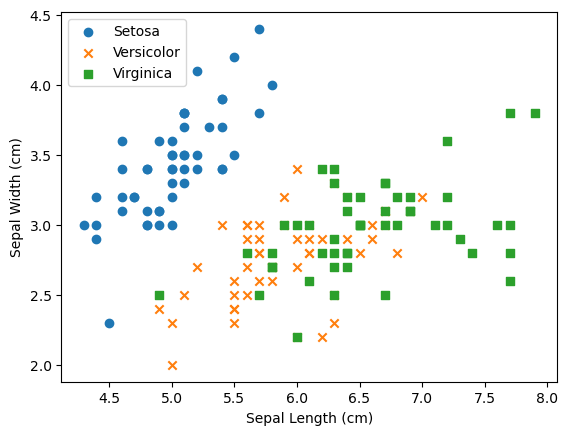

In [173]:
#plot for species with respective parameters
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa", marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Versicolor", marker='x')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label="Virginica", marker='s')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc='upper left')
plt.show()

In [174]:
iris_data['feature_names']#feature names(variable names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [175]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [176]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])

In [177]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [178]:
iris_df['Iris type'] = iris_data['target']

In [179]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [180]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [181]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


In [182]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [183]:
iris_df['test'] = iris_df['Iris type'].apply(f)

In [184]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name,test
0,5.1,3.5,1.4,0.2,0,sentosa,setosa
1,4.9,3.0,1.4,0.2,0,sentosa,setosa
2,4.7,3.2,1.3,0.2,0,sentosa,setosa
3,4.6,3.1,1.5,0.2,0,sentosa,setosa
4,5.0,3.6,1.4,0.2,0,sentosa,setosa


In [185]:
iris_df.drop(['Iris name'], axis =1, inplace = True)

In [186]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,test
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [187]:
iris_df.describe()#To display statistics about data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [188]:
iris_df['test'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: test, dtype: int64

<Axes: >

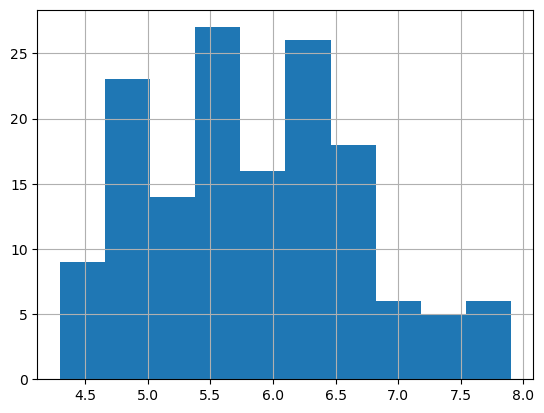

In [189]:
#visualization of sepal length
iris_df['sepal length (cm)'].hist()

<Axes: >

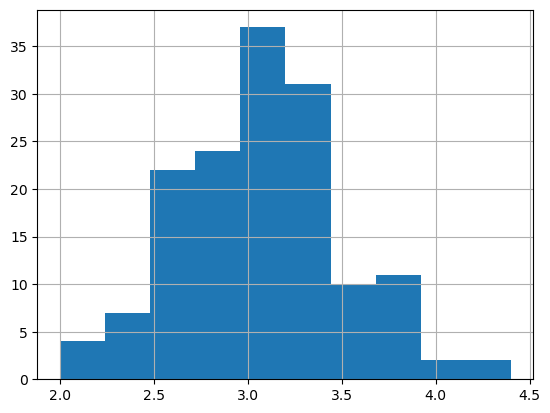

In [190]:
#visualization of sepal width
iris_df['sepal width (cm)'].hist()

In [191]:
iris_df = iris_df.rename(columns={'test': 'Species'})

In [192]:
#scatterplot
colors=['red','orange','blue']
species=['setosa', 'versicolor', 'virginica']


C:\Users\krish\AppData\Local\Temp\ipykernel_324\2837550993.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_df.corr()


<Axes: >

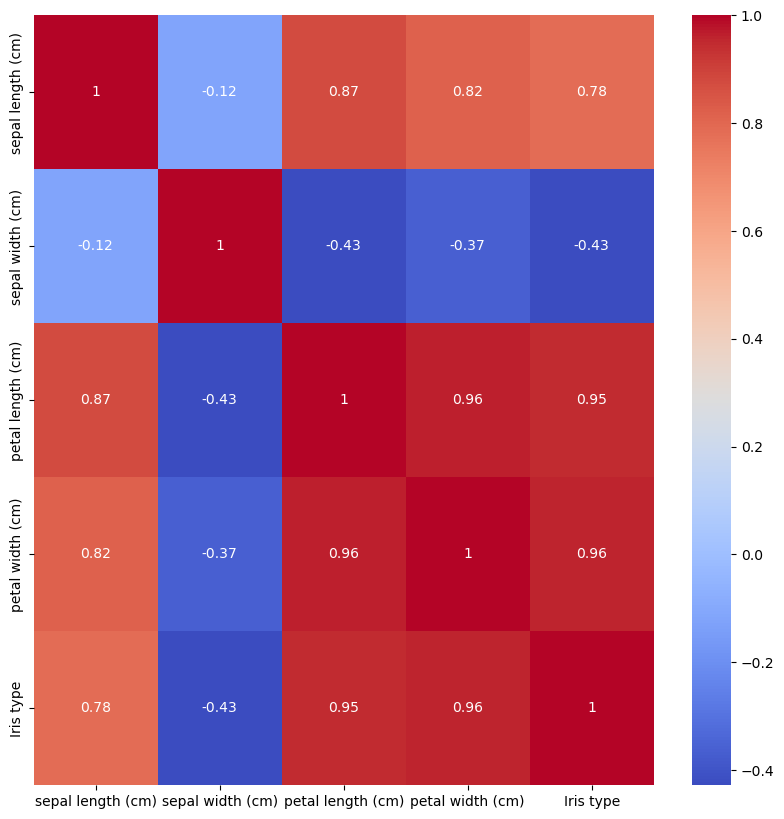

In [193]:
#Correlation matrix
corr=iris_df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

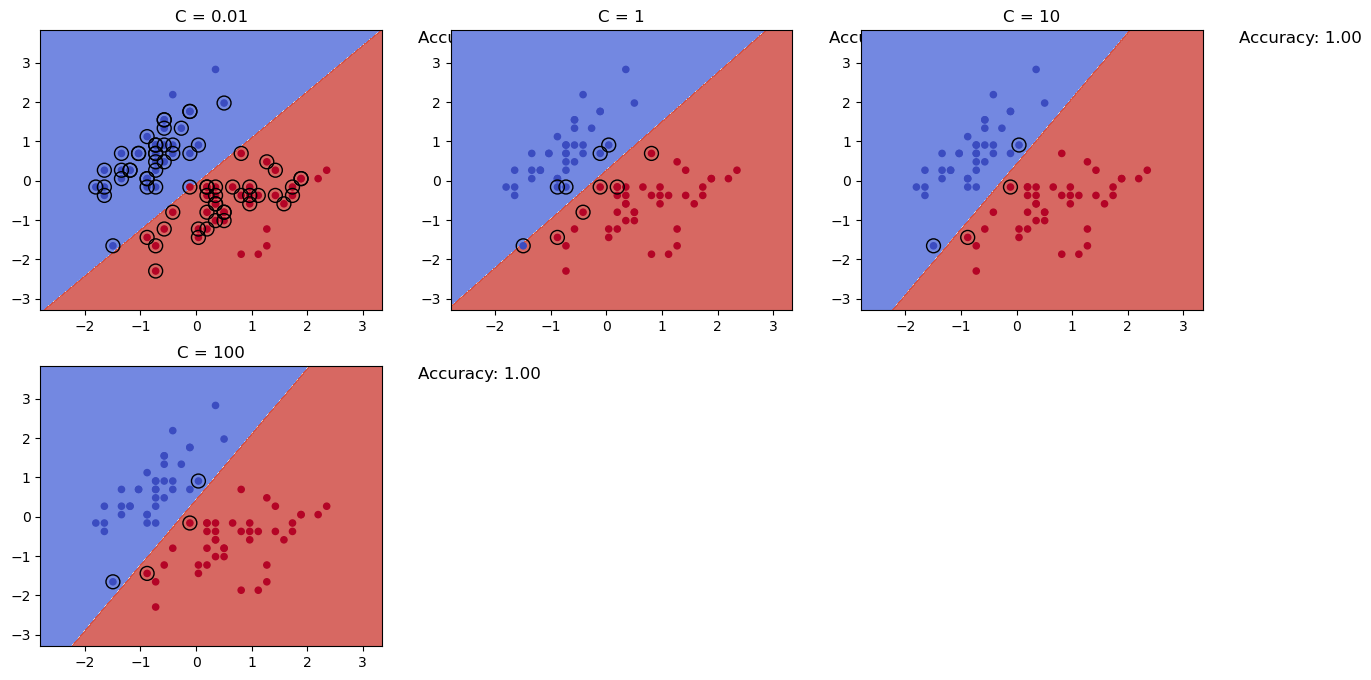

In [206]:
#SVM with Linear Kernel
# Select two classes for binary classification (e.g., Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling (standardization) to the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to experiment with different values of C
def experiment_with_C(X_train, y_train, X_test, y_test, C_values):
    plt.figure(figsize=(15, 8))

    for i, C in enumerate(C_values):
        plt.subplot(2, 3, i + 1)

        # Create and train the SVM model with different C
        svm = SVC(kernel='linear', C=C)
        svm.fit(X_train, y_train)

        # Create a mesh grid of points for visualization
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Use the SVM model to make predictions on the mesh grid
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary and margin
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)

        # Highlight support vectors
        plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

        plt.title(f'C = {C}')
        
        # Evaluate and print accuracy on the test set
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        plt.text(4, 3.5, f'Accuracy: {accuracy:.2f}', fontsize=12)

    plt.show()

# Specify the values of C to experiment with
C_values = [0.01, 1, 10, 100]

# Call the function to experiment with different C values
experiment_with_C(X_train, y_train, X_test, y_test, C_values)


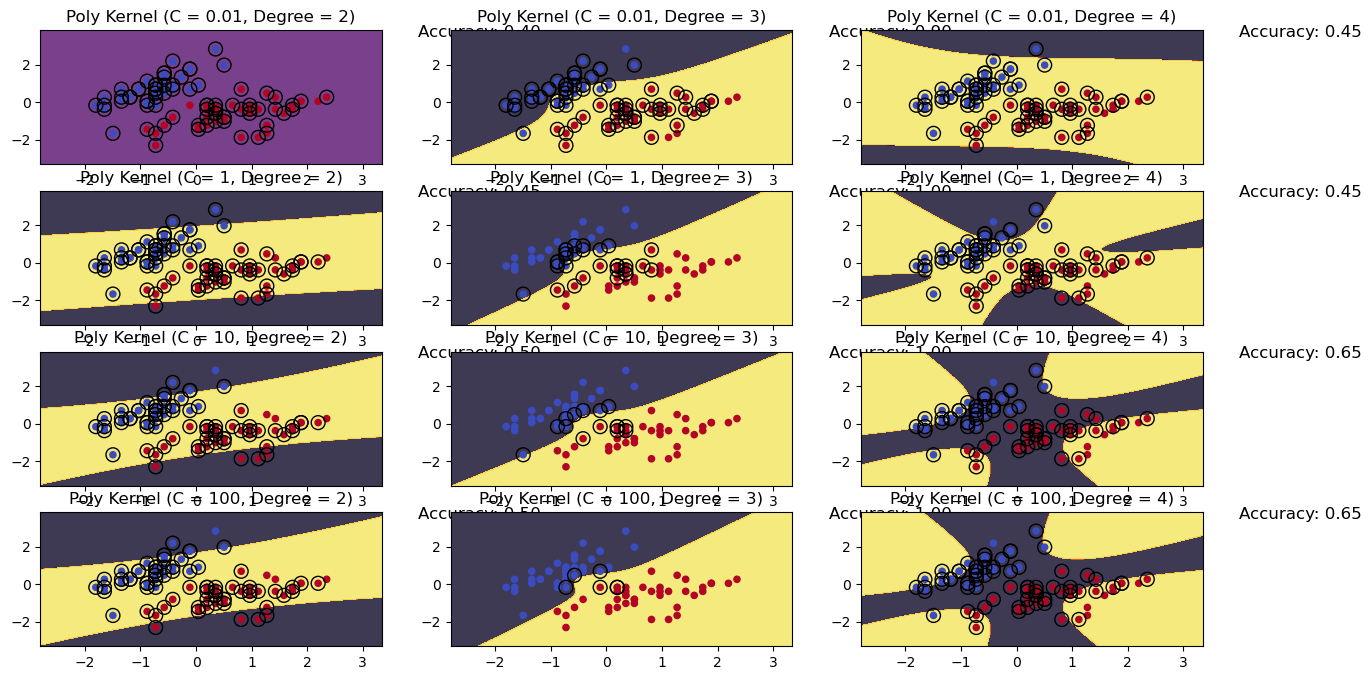

In [204]:
# SVM with different values of C and degree for the polynomial kernel
def experiment_with_polynomial_kernel(X_train, y_train, X_test, y_test, C_values, degrees):
    plt.figure(figsize=(15, 8))

    for i, C in enumerate(C_values):
        for j, degree in enumerate(degrees):
            plt.subplot(len(C_values), len(degrees), i * len(degrees) + j + 1)

            # Create and train the SVM model with the polynomial kernel, specific C, and degree
            svm = SVC(kernel='poly', C=C, degree=degree, gamma='scale')
            svm.fit(X_train, y_train)

            # Create a mesh grid of points for visualization
            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

            # Use the SVM model to make predictions on the mesh grid
            Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary and margin
            plt.contourf(xx, yy, Z, cmap=plt.cm.inferno, alpha=0.8)
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)

            # Highlight support vectors
            plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

            plt.title(f'Poly Kernel (C = {C}, Degree = {degree})')
            
            # Evaluate and print accuracy on the test set
            y_pred = svm.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            plt.text(4, 3.5, f'Accuracy: {accuracy:.2f}', fontsize=12)

    plt.show()

# Specify the values of C and degrees to experiment with for the polynomial kernel
C_values_poly = [0.01, 1, 10, 100]
degrees_poly = [2, 3, 4]

# Call the function to experiment with the polynomial kernel
experiment_with_polynomial_kernel(X_train, y_train, X_test, y_test, C_values_poly, degrees_poly)


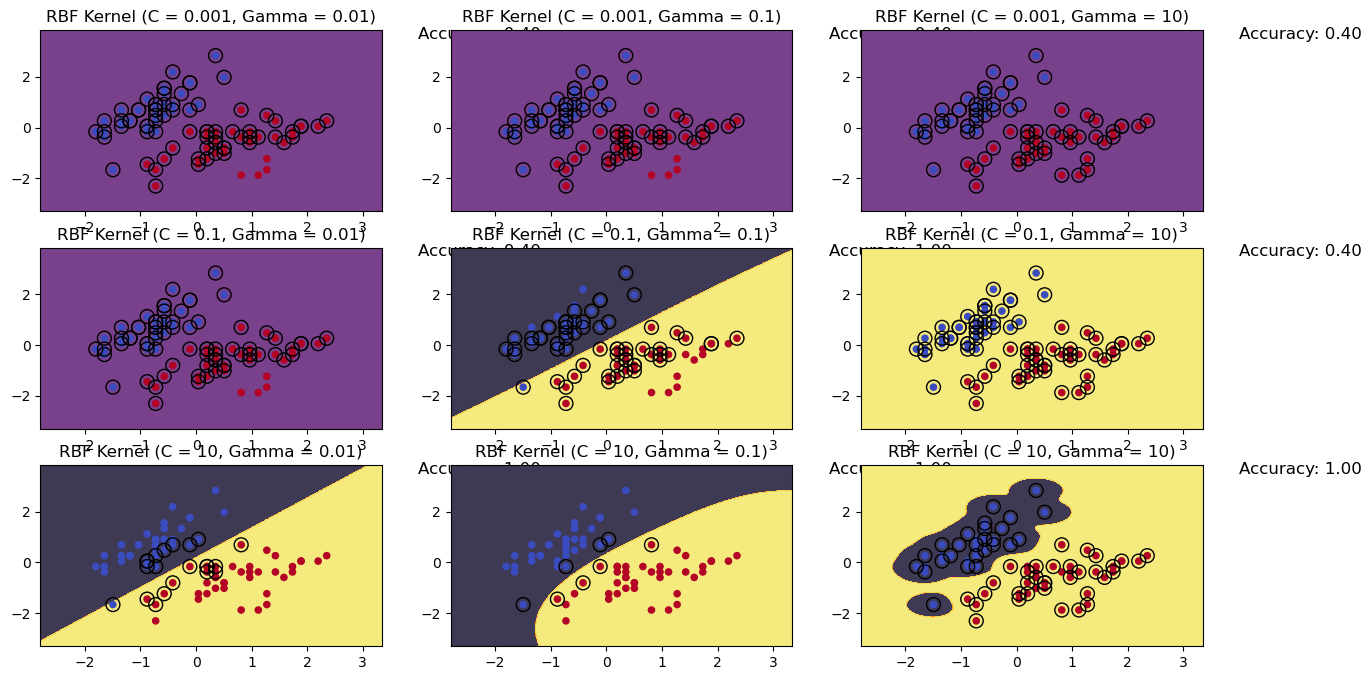

In [2]:
#SVM with different c and gamma values for rbf kernel
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
iris_data = datasets.load_iris()
X = iris_data["data"][:, (0,1)]  #  sepal length, sepal width
y = iris_data["target"]#Get the labels for each sample.
# Select two classes for binary classification (e.g., Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling (standardization) to the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define a function to experiment with different values of C for the RBF kernel
def experiment_with_rbf_kernel(X_train, y_train, X_test, y_test, C_values, gamma_values):
    plt.figure(figsize=(15, 8))

    for i, C in enumerate(C_values):
        for j, gamma in enumerate(gamma_values):
            plt.subplot(len(C_values), len(gamma_values), i * len(gamma_values) + j + 1)

            # Create and train the SVM model with the RBF kernel, specific C, and gamma
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_train, y_train)

            # Create a mesh grid of points for visualization
            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

            # Use the SVM model to make predictions on the mesh grid
            Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary and margin
            plt.contourf(xx, yy, Z, cmap=plt.cm.inferno, alpha=0.8)
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20)

            # Highlight support vectors
            plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

            plt.title(f'RBF Kernel (C = {C}, Gamma = {gamma})')
            
            # Evaluate and print accuracy on the test set
            y_pred = svm.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            plt.text(4, 3.5, f'Accuracy: {accuracy:.2f}', fontsize=12)

    plt.show()

# Specify the values of C and gamma to experiment with for the RBF kernel
C_values_rbf = [0.001, 0.1, 10]
gamma_values_rbf = [0.01, 0.1, 10]

# Call the function to experiment with the RBF kernel
experiment_with_rbf_kernel(X_train, y_train, X_test, y_test, C_values_rbf, gamma_values_rbf)

In [199]:
# Training SVM classifier with scaled features
svm_scaled = SVC(kernel='linear')
svm_scaled.fit(X_train_scaled, y_train)

# Train an SVM classifier without scaled features
svm_unscaled = SVC(kernel='linear')
svm_unscaled.fit(X_train, y_train)

# Evaluate their performance
y_pred_scaled = svm_scaled.predict(X_test_scaled)
y_pred_unscaled = svm_unscaled.predict(X_test)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Compare the performance and decision boundaries
print("Accuracy with scaling:", accuracy_scaled)
print("Accuracy without scaling:", accuracy_unscaled)

Accuracy with scaling: 1.0
Accuracy without scaling: 1.0


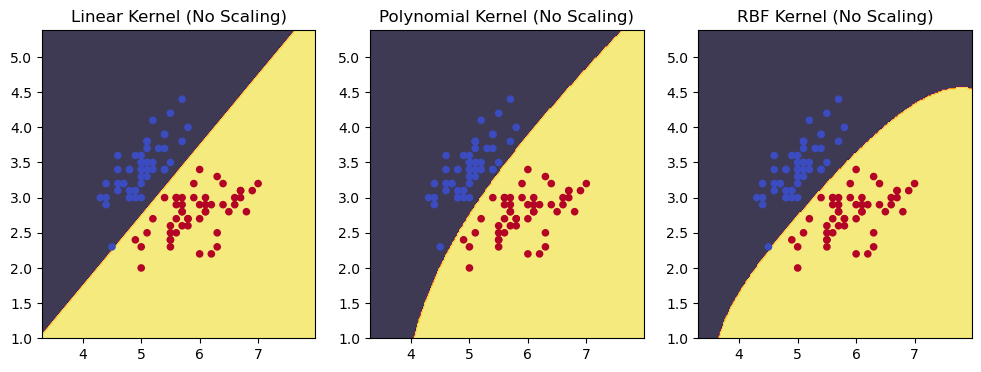

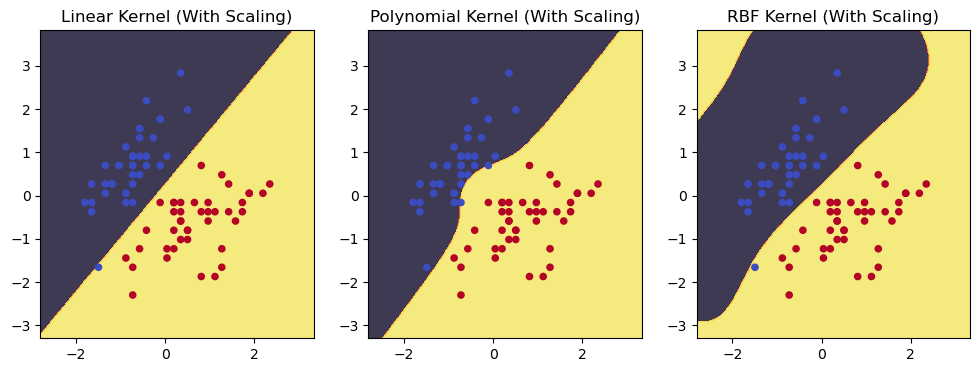

In [200]:
# Contrasting with and without feature scaling
def plot_decision_boundary(svm, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.inferno, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
    plt.title(title)

# Without Feature Scaling
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_no_scaling_linear, X, y, 'Linear Kernel (No Scaling)')

plt.subplot(1, 3, 2)
plot_decision_boundary(svm_no_scaling_poly, X, y, 'Polynomial Kernel (No Scaling)')

plt.subplot(1, 3, 3)
plot_decision_boundary(svm_no_scaling_rbf, X, y, 'RBF Kernel (No Scaling)')

# With Feature Scaling
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_with_scaling_linear, X_train_scaled, y_train, 'Linear Kernel (With Scaling)')

plt.subplot(1, 3, 2)
plot_decision_boundary(svm_with_scaling_poly, X_train_scaled, y_train, 'Polynomial Kernel (With Scaling)')

plt.subplot(1, 3, 3)
plot_decision_boundary(svm_with_scaling_rbf, X_train_scaled, y_train, 'RBF Kernel (With Scaling)')

plt.show()
